In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_rows", 50)


In [2]:
# importing the dataset
jobs = pd.read_csv('fraud.csv')

In [3]:
# to view 5 random samples of the dataset
jobs.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
12331,12332,Senior AR Associate,"IN, TN, Chennai",AR,NaN,"Established in 1999, Prometheus Group is a le...",Initiate telephone calls to insurance companie...,Good voice and demonstrate professional demean...,Competitive SalarySign on bonus upto Rs. 25000...,0,1,1,Full-time,Mid-Senior level,NaN,Outsourcing/Offshoring,Health Care Provider,0
5361,5362,Shapeways Technology Intern,"US, NY, New York",NaN,NaN,Shapeways is the leading 3D printing marketpla...,Technology interns at Shapeways work alongside...,Please be sure to include which technology tea...,NaN,0,1,1,Temporary,Internship,NaN,Information Technology and Services,Engineering,0
3766,3767,Marketing/Operations Intern,"US, NY, New York",NaN,NaN,NaN,LSM has been referred to as the “Harvard of Hu...,Deep understanding of the tech ecosystem and a...,Work with lean thought leaders and our global ...,0,0,1,Part-time,Internship,Some College Coursework Completed,Professional Training & Coaching,Marketing,0
6617,6618,Inside Sales Specialist Western Region,"US, WA, Bellingham",NaN,32000-52000,POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,QualificationsStrong interest in a sales and c...,"Pay $32 - $52k, Depending on experience and pe...",0,1,1,Full-time,Associate,Bachelor's Degree,Computer Hardware,Sales,0
2264,2265,Marketing & Communications professional,"GR, I, ATHENS",NaN,NaN,"In OPUS Integrated Communication we plan, orga...","• Manage, plan and deliver multi-channel commu...",- Excellent media relations skills and...,We seek an individual committed to long-term g...,0,1,1,Part-time,Mid-Senior level,Master's Degree,Public Relations and Communications,Marketing,0


In [4]:
#checking the number of rows and columns in the dataset
print('The dataset consists of {} rows and {} columns'.format(jobs.shape[0],jobs.shape[1]))

The dataset consists of 17880 rows and 18 columns


In [5]:
#to view the columns in the dataset
jobs.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
#checking for columns with missing values
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

##### Majority of the columns in the dataset contains missing values

In [7]:
#Checking for duplicated rows in the dataset
print('Duplicated values in the dataset = {}'.format(jobs.duplicated().sum()))

Duplicated values in the dataset = 0


In [8]:
#Checking the general info of the dataset
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

The dataset contains integer and categorical dat types and consumes a memory space of over 2.5MB

In [40]:
#converting fraudulent column from integer to categorical to aid analysis and visualization of data
#jobs['fraudulent'] = jobs.fraudulent.astype('category')

In [9]:
#getting a statistical summary of the dataset
jobs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,17880,NaN,NaN,NaN,8940.5,5161.66,1,4470.75,8940.5,13410.2,17880
title,17880,11231,English Teacher Abroad,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,17534,3105,"GB, LND, London",718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,6333,1337,Sales,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_range,2868,874,0-0,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_profile,14572,1708,We help teachers get safe &amp; secure jobs ab...,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,17879,14760,"Play with kids, get paid for it Love travel? J...",379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requirements,15185,11928,University degree required. TEFL / TESOL / CEL...,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
benefits,10670,6146,See job description,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telecommuting,17880,NaN,NaN,NaN,0.0428971,0.202631,0,0,0,0,1


##### OBSERVATIONS
1. There are a total of 131 unique industry types in 3105 unique locations in the dataset
2. A total of 17880 job postings were made and over 75% of the postings were identified as non-fraudulent.
3. Majority of the jobs are full-time jobs.

### EXPLORATORY DATA ANALYSIS

##### Question: find out which industry has the highest number of fake job postings.

In [10]:
# obtaining the industry and the number of fraudulent posting in that industry
industry_fraud = jobs.groupby('industry')['fraudulent'].sum().reset_index().sort_values(by='fraudulent',ascending=False)

# obtaining the top 20 industries with the most fraudulent posting
industry_fraud = industry_fraud.head(20).reset_index().drop('index',axis=1)
industry_fraud

,industry,fraudulent
0,Oil & Energy,109
1,Accounting,57
2,Hospital & Health Care,51
3,Marketing and Advertising,45
4,Financial Services,35
5,Information Technology and Services,32
6,Telecommunications,26
7,Consumer Services,24
8,Real Estate,24
9,"Leisure, Travel & Tourism",21


The oil and gas industry has the most fraudulent number of posting

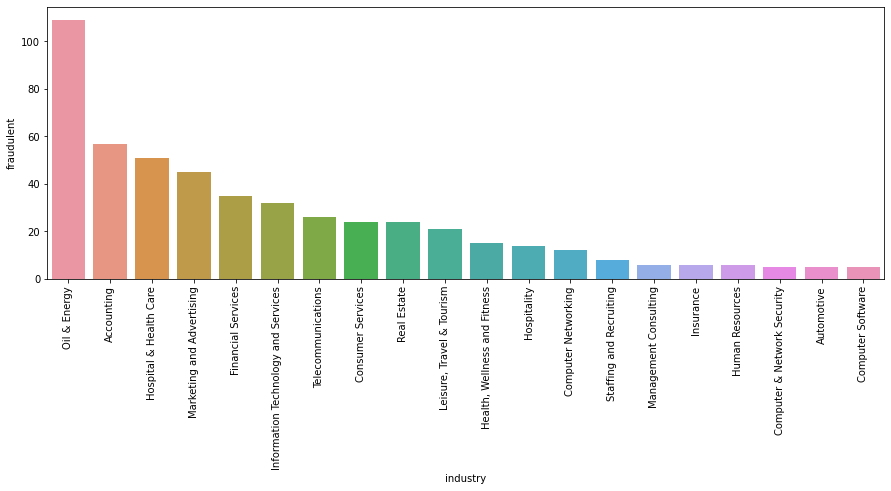

In [11]:
#visualizing the above information
plt.figure(figsize=(15,5)) #setting the figure size to 15x5
sns.barplot(data=industry_fraud,x='industry',y='fraudulent')
plt.xticks(rotation=90) # setting the labels of the x axis to be at 90 degrees
plt.show() # to view the plot

#### CONCULSION
1. From the above analysis, the oil and gas industry has the highest number of fraudulent job posting. A total of 109 fraudulent posting.
2. Accounting, health care, marketing and advertising industries have above 40 but less than 60 fraudulent posting.